In [23]:
pip install -U libsvm-official

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


*
optimization finished, #iter = 31
nu = 0.500000
obj = -11.993672, rho = 0.334719
nSV = 21, nBSV = 19
Total nSV = 21


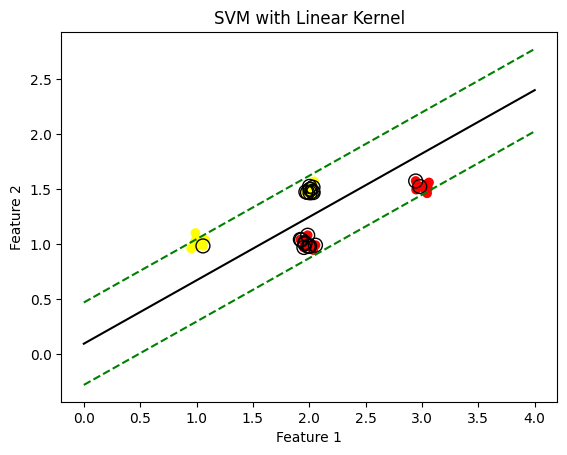

The margin is 0.37


In [44]:
from libsvm.svmutil import * 
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Generating 2D Samples in Gaussian Clusters
# a) Generate 2D samples in four Gaussian clusters
#np.random.normal function generates random samples from a normal distribution with the following format
# loc: Mean (“centre”) of the distribution, tuple x,y coordinates
# scale: Standard deviation (spread or “width”) of the distribution.
# size: Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.
# For the size 10,2 was selected because we want 10 samples of 2 dimensions x,y

cluster1 = np.random.normal(loc=[1, 1], scale=0.04, size=(10, 2)) 
cluster2 = np.random.normal(loc=[2, 1.5], scale=0.04, size= (10, 2)) 
cluster3 = np.random.normal(loc=[2, 1], scale=0.04, size= (10, 2))
cluster4 = np.random.normal(loc=[3, 1.5], scale=0.04, size= (10, 2))

# Combine clusters arrays vertically (vstack)
# Label the clusters with 1 and -1
X = np.vstack([cluster1, cluster2, cluster3, cluster4]) # 40 samples of 2 dimensions x,y
y = np.array([1]*20 + [-1]*20) # 1 for cluster1 and cluster2, -1 for cluster3 and cluster4


# Prepare data for LIBSVM
svm_problem_setup = svm_problem(y.tolist(), X.tolist())

# b) Train a linear SVM
parameters = svm_parameter('-t 0')  # -t kernel_type, 0 for linear u'*v
svm_model = svm_train(svm_problem_setup, parameters)

# c) Extract Parameters and Graphical Representation
sv_indices = svm_model.get_sv_indices() # Get indices of support vectors
sv = svm_model.get_SV() # Get support vectors themselves
lagrange_multipliers = np.abs(svm_model.get_sv_coef()) # Get lagrange multipliers constrained a > 0 (abs to remove possible -0.0)

# Compute primal parameters
# ensuring the following are numpy arrays
lagrange_multipliers = np.array(lagrange_multipliers).reshape(-1) # Reshape to 1D array
y = np.array(y)
sv_indices = np.array(sv_indices)
sv = np.array(([[d[1], d[2]] for d in sv])) # converting from dictionary to np array

# w = np.sum((lagrange_multipliers * y[sv_indices]).reshape(-1,1) * sv, axis=0)
yi = y[sv_indices-1] # support vector labels, -1 to account for python indexing 
w = np.dot((lagrange_multipliers * yi).reshape(-1,1).T, sv) # w = sum (α_i * y_i * x_i)
bias = -svm_model.rho.contents.value # bias = -ρ

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k') # Plot support vectors
plt.title('SVM with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot separating line
xx = np.linspace(0, 4)
yy = - (w[0][0]*xx + bias) / w[0][1] # w0*x + w1*y + b = 0
plt.plot(xx, yy, 'k-')


# d) Check support vectors are inside or on the margin
margin = 1.5/np.linalg.norm(w)
yyum = yy + margin
yylm = yy - margin
plt.plot(xx, yyum, 'g--') # upper margin
plt.plot(xx, yylm, 'g--') # lower margin

plt.show()    


print(f"The margin is {margin:.2f}")

In [38]:

for l in range(sv.size):
    if sv[:, 1][l] > yyum[sv_indices][l]:
        print(f"Error!! Support vector {l} with a value of {sv[:,1][l]} is above the upper margin {yyum[sv_indices][l]  }") 
    elif sv[:, 1][l] < yylm[sv_indices][l]:
        print(f"Error!! Support vector {l} with a value of {sv[:,1][l]} is below the upper margin {yylm[sv_indices][l]  }") 
    else:
        break

# print(yyum[sv_indices].size)
# print(sv[:, 1].size)
# print(yylm[sv_indices].size)

Error!! Support vector 0 with a value of 0.9528959036629555 is above the upper margin 0.3240119505362661
Error!! Support vector 1 with a value of 1.5197320873828488 is above the upper margin 0.829593924045334
Error!! Support vector 2 with a value of 1.5533715256278786 is above the upper margin 0.8801521213962409
Error!! Support vector 3 with a value of 1.5044702550017965 is above the upper margin 0.9307103187471475
Error!! Support vector 4 with a value of 1.5414226460280966 is above the upper margin 0.9812685160980543
Error!! Support vector 5 with a value of 1.4498699692920187 is above the upper margin 1.0318267134489612
Error!! Support vector 6 with a value of 1.465127685388636 is above the upper margin 1.082384910799868
Error!! Support vector 7 with a value of 1.475794992275408 is above the upper margin 1.1329431081507748
Error!! Support vector 8 with a value of 1.5127657715497076 is above the upper margin 1.1835013055016816
Error!! Support vector 9 with a value of 1.4756039483060222